# Applications of Fourier Transform

## Convolution in Frequency

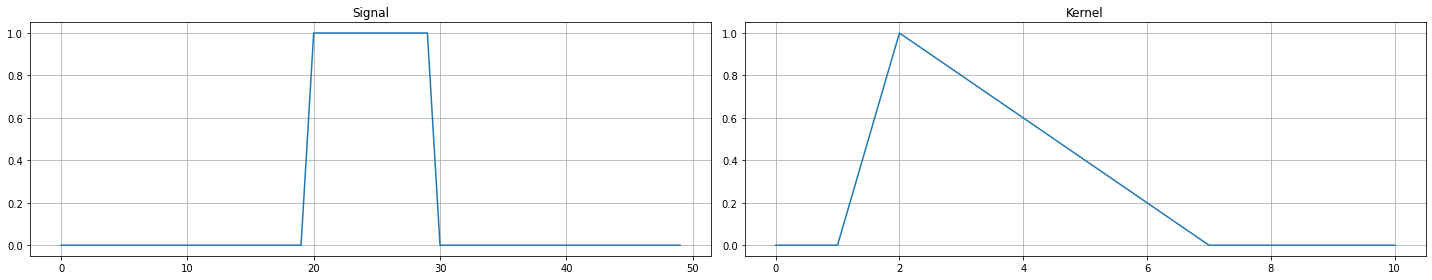

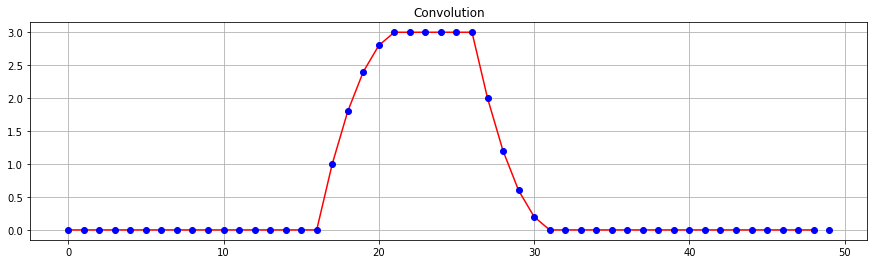

In [1]:
import numpy
from scipy import fftpack
from matplotlib import pyplot as plot

signal = numpy.zeros(50)
signal[range(int(50 * .4), int(50 * .6))] = 1

kernel = numpy.zeros(11)
kernel[range(int(11 * .25), int(11 * .8))] = numpy.linspace(1, 0, int(11 * .55))

plot.figure(figsize=(20,4))

plot.subplot(1,2,1)
plot.plot(signal)
plot.title('Signal')
plot.grid()

plot.subplot(1,2,2)
plot.plot(kernel)
plot.title('Kernel')
plot.grid()

plot.tight_layout()
plot.show()

s = fftpack.fft(signal,60)
k = fftpack.fft(kernel,60)

conv = numpy.real(fftpack.ifft(numpy.multiply(s,k)))
conv = conv[range(5, len(conv) - 6)]

plot.figure(figsize=(15,4))
plot.plot(conv, 'r')
plot.title('Convolution')
plot.grid()
plot.plot(numpy.convolve(signal,kernel,mode='same'),'bo')
plot.show()

## Filter Signal in One Dimension

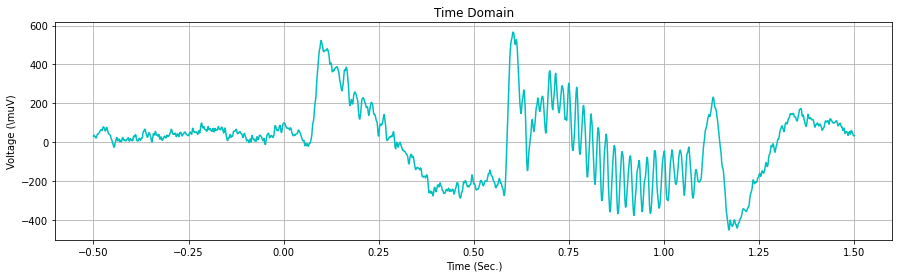

In [2]:
from scipy import io as sio

mat_data = sio.loadmat('../Data/braindata.mat')
time_vec = mat_data['timevec'][0]
brain_data = mat_data['braindata'][0]

plot.figure(figsize=(15,4))
plot.plot(time_vec, brain_data, color='c')
plot.title('Time Domain')
plot.xlabel('Time (Sec.)')
plot.ylabel('Voltage (\muV)')
plot.grid()
plot.show()

### A

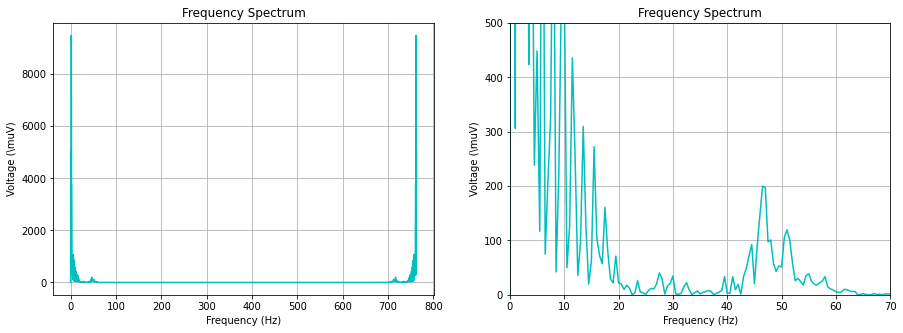

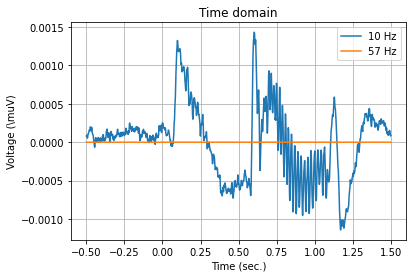

In [3]:
from scipy import fftpack

x = fftpack.fft(brain_data) / len(time_vec)
amp = 2 * (numpy.abs(x)**2)
freq = numpy.linspace(0,mat_data['srate'][0],len(time_vec))

plot.figure(figsize=(15,5))

plot.subplot(1,2,1)
plot.plot(freq,amp[0:len(freq)],color='c')
plot.xlabel('Frequency (Hz)')
plot.ylabel('Voltage (\muV)')
plot.title('Frequency Spectrum')
plot.grid()

plot.subplot(1,2,2)
plot.plot(freq,amp[0:len(freq)],color='c')
plot.xlim([0,70])
plot.ylim([0,500])
plot.xlabel('Frequency (Hz)')
plot.ylabel('Voltage (\muV)')
plot.title('Frequency Spectrum')
plot.grid()

plot.show()

filter_freq = [10,57]
for f in filter_freq:
    ff  = freq - f
    gaussian_filter = numpy.exp(-(ff/4)**2)
    filtered = 2 * numpy.real(fftpack.ifft(numpy.multiply(x,gaussian_filter)))

    plot.plot(time_vec,filtered[0],label=f'{f} Hz')
    plot.xlabel('Time (sec.)')
    plot.ylabel('Voltage (\muV)')
    plot.title('Time domain')

plot.grid()
plot.legend()
plot.show()

### B

## Filter Signal in Two Dimension

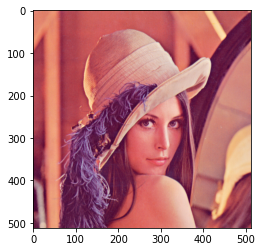

In [4]:
from PIL import Image

lenna = numpy.asarray(Image.open('../Data/Lenna.png'))
plot.imshow(lenna)
plot.show()

### Low Pass Filter

#### A

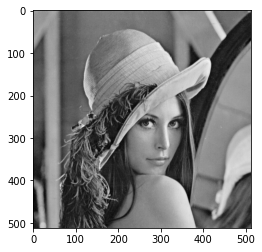

In [5]:
lenna = lenna.mean(axis=2, keepdims=False)
plot.imshow(lenna,cmap='gray')
plot.show()

#### B

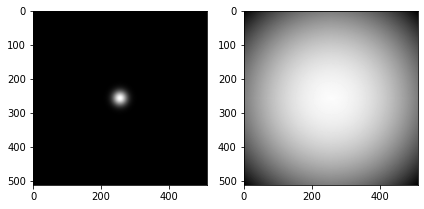

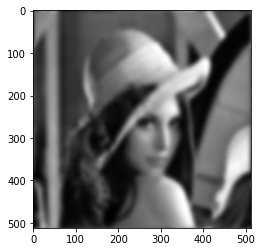

In [6]:
from scipy import stats
from scipy import fftpack

lenna_fourier = fftpack.fft2(lenna)
lenna_shifted = fftpack.fftshift(lenna_fourier)

width = 0.1
lims = numpy.shape(lenna)
xr = stats.zscore(numpy.arange(lims[0]))
[x,y] = numpy.meshgrid(xr, xr)
gaus2d = numpy.exp(-(x**2 + y**2)/(2*width**2))

plot.figure()

plot.subplot(1,2,1)
plot.imshow(gaus2d, cmap='gray')

plot.subplot(1,2,2)
blur = lenna_shifted * gaus2d
f_spectrum = numpy.log(numpy.abs(blur))
plot.imshow(f_spectrum, cmap='gray')

plot.tight_layout()
plot.show()

ffs = fftpack.ifft2(fftpack.ifftshift(blur))
ps = numpy.square(numpy.abs(ffs))
plot.imshow(ps, cmap = 'gray')
plot.show()

### High Pass Filter

#### A

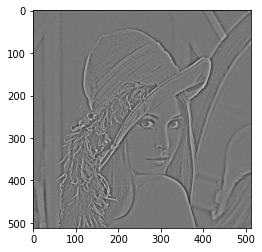

In [7]:
from scipy import ndimage

lp = ndimage.gaussian_filter(lenna,3)
hpf = lenna - lp
plot.imshow(hpf, cmap = 'gray')
plot.show()


#### B

As we can see sharp parts of picture are more visible like nose.